<a href="https://colab.research.google.com/github/lemononu/knn-from-scratch/blob/master/TASK_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [49]:
# Your code goes here
import pandas as pd
df = pd.read_csv('/content/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [51]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [52]:
X = df.iloc[:,0:9]
y = df.iloc[:,-1]

In [53]:
X.shape

(214, 9)

In [54]:
y.shape

(214,)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [56]:
X_train.shape

(171, 9)

In [57]:
y_train.shape

(171,)

In [58]:
X_test.shape

(43, 9)

In [59]:
y_test.shape

(43,)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7906976744186046

In [64]:
# selecting the best k value
scores = []
for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))

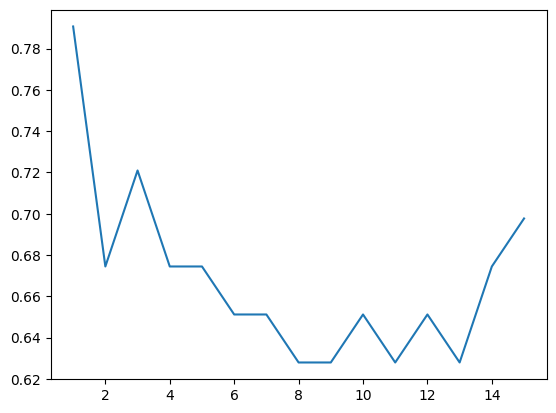

In [66]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)